# Exoplanet Summer 2022
## Abstract
The search for habitable exoplanets has been the purpose for our research this semester. Considering that there are thousands of exoplanets in the universe, we believe that there must be at least one that possesses the characteristics needed to support basic life - the capability to hold liquid water. The most important question, therefore, is: can a given exoplanet support liquid or molecular water? Whether or not this is possible depends on a multitude of characteristics unique to each exoplanet, including planetary radius, orbital period, stellar radius, and planetary mass, which work together to create an environment capable of life. The purpose of our research in Summer 2022 was to unravel this “mystery” by looking at data values from the NASA Exoplanet Archive (Planetary Systems Dataset). We started with a Python program to find and remove duplicate entries in the NASA Exoplanet Archives. We then analyzed multiple planetary and stellar data values through the analysis of luminosity and absolute magnitude to filter out a list for us to take a deep dive into. Subsequently, we conducted statistical calculations for further analysis. Further efforts were made by applying Albedo and Circumstellar Habitable Zone (CHZ) data to the analysis of the habitability of an exoplanet. In the end, we formulated a list of ten exoplanets that we believe to be capable of supporting life.

## Background
The purpose behind our search for exoplanets is to reveal the possibilities of life beyond earth. We have always looked at the cosmos as a dark and inhabitable vacuum, but the chances of Earth being the only planet with life in this universe are slim. All creatures look up to the sky, but the ability to question what is there is what makes the human species different from others. And the ability to persevere to answer this question has gotten us where we are. So far, we have been able to prove that Mars has very similar characteristics to Earth through robotic missions, and we are continuing to make new discoveries not only about Mars's geological history, but how we evolved as well. This knowledge will only be furthered by expanding beyond our solar system. Ever since the first ever exoplanet was discovered in 1992, there have been over 35,000 more exoplanets that have been confirmed to be present outside our solar system. We will deepen our understanding of our purpose as a planet, and be able to realize how significant we are. There are other benefits as well, such as the infinite resources space has to offer, and the reassurance that we can become an interplanetary species, but in this paper, we simply focus on addressing the first challenge: detecting exoplanets. 

## Search for habitability
During the hunt for potentially habitable exoplanets, we looked through the NASA Exoplanet Archive, searching for the qualities that would determine if a specific planet could be inhabited by humans. Since our goal was to identify exoplanets that can support life, we considered how to best succeed at this objective. We learned that the simplest method of beginning to check if a planet could support life is to find out whether or not the said planet can hold liquid water. This is because water, in its liquid form, has a number of characteristics that make it necessary for life. It can cause adhesion and cohesion, can dissolve more substances than any other liquid, and is able to withstand large changes in temperature. Although no dataset contains information about liquid water itself, we utilized various techniques to discover more about the exoplanets and their capability to sustain the “universal solvent.” One of these methods is deduping the dataset; this involves removing the duplicates of each planet with multiple entries in the set and thus making the data clearer. Another useful technique is Keplerian Mechanics, in which we define a certain planet to be habitable if other celestial bodies that are similar to the exoplanet in question (e.g. Earth and K2-18 b) are. The most important method we implemented this Fall is the five-number summary. Including statistics in our research greatly increased our productivity. Additionally, we tried to use other methods such as habitable zone calculations and albedo. Our result was a list of ten exoplanets whose characteristics matched those of Earth and K2-18 b.

## Elimination Process

In our Elimination process, we have two different type of analysis: removal of duplicate entries and the elimination of planets with controversial flags of 1. 

### Deduplication

The NASA Exoplanet Archive has over 35,000 entries as of July 2022, consisting of duplicate values for the majority of planets listed. Thus, to eliminate the various duplicate entries, we initially read the dataset as a Pandas dataframe via the Pandas module in Python. After, we arranged all the entries based on the publication date of each planet in ascending order - which can be denoted as disc_pubdate. The sorting of data was crucial to preserving the most recent and accurate finding for each exoplanet, as we only intend on keeping the last occurrence of a particular exoplanet, since it is assumed to be the most up-to-date. The removal of duplicate entries in NASA’s Exoplanet Archive successfully narrows down 35,000 entries to simply 5,055 exoplanets. Thus, it yields an elimination of almost 30,000 planets standalone - making it a vital process when performing our analysis. 


In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

df = pd.read_csv('../data/dataset.csv', low_memory=False)

In [2]:
# Saving for later, where we will get to elimination process
planet_names = df["pl_name"]
controv_flags_col = df['pl_controv_flag']

In [3]:
duplicate_count = planet_names.value_counts()
duplicate_count

TrES-2 b       30
GJ 436 b       20
HD 209458 b    19
HAT-P-7 b      19
Kepler-10 b    19
               ..
HD 216520 c     1
HD 215497 c     1
HD 215152 e     1
HD 215152 d     1
HD 176986 b     1
Name: pl_name, Length: 5054, dtype: int64

In [4]:
df.sort_values('disc_pubdate', ascending=True)

df = df.drop_duplicates(subset=['pl_name'], keep='last')

df.reset_index(drop=True, inplace=True)

In [5]:
print("New size of dataset: " + str(len(df)-1))

New size of dataset: 5053


### Removal of controversial flags


After wiping out entries of duplicate exoplanets with  outdated publication dates, we ventured to further our process of elimination by removing entries with a controversial flag of 1. Controversial flags are denoted by the term pl_controv_flag, by which they are represented in boolean values of either 0 or 1. When an exoplanet has a controversial flag of 0, then it is considered to be a confirmed planet, making it a potential contender for being capable of sustaining human life. However, if an exoplanet has a controversial flag of 1, then its existence has been questioned in the past - making it not completely confirmed. 

In [6]:
df = df.loc[controv_flags_col != 1]
df.reset_index(drop=True, inplace=True)

In [7]:
print("New size of dataset: " + str(len(df)-1))

New size of dataset: 5032


## CHZ Process

Through our CHZ process, we eliminate all the planets that are not within our circumstellar habitable zone. Amid our process, we consider various factors such as the stellar type, planetary luminosity, bolometric lumniocity, absolute magnitude, semi minor/major axis, and more. 

### Luminosity and absolute magnitude

After de-duplicating the dataset and removing planets with controversial flags, we were ready to perform the CHZ calculations. The stellar luminosity was the core of these calculations because it was needed to determine the inner and outer bounds of the CHZ. 

The values for stellar luminosity in the dataset were represented as logarithms of their actual values, so if there was a value for the luminosity of the host star of an exoplanet, we had to raise 10 to the power of that value to determine the host star’s luminosity (in solar luminosities), as shown in Figure 1.

While performing this calculation, we found that many planets had null values for their host star’s luminosity. Therefore, we used the Stefan-Boltzmann law to calculate the luminosity of a host star if it did not already have a value for its luminosity. However, the Stefan-Boltzmann law required values for stellar radius and stellar temperature, so if a host star’s luminosity and at least one of its radius and temperature values were null, there was no possible way to determine its luminosity. There were 594 exoplanets for which the aforementioned conditions were true, so we had to remove them from the dataset. However, this does not mean that the removed exoplanets are not habitable; we simply could not determine their habitability because they were missing too many values in the dataset. 

In [8]:
for i in range(0, len(df)):

    # The values for luminosity in the dataset are represented as logs, so
    # if there is a value, the actual luminosity (in solar luminosities)
    # is 10 to the power of that value

    if pd.notna(df['st_lum'][i]):
        df['st_lum'][i] = 10**(df['st_lum'][i])

    # If there's not a luminosity value, but there are stellar radius and
    # temperature values, the luminosity can be calculated using the
    # Stefan-Boltzmann law, with all untis in terms of the Sun's physical
    # parameters (the Sun's temperature is 5778 K and the stellar radius is
    # already in terms of the Sun's radius)

    if ((pd.isna(df['st_lum'][i])) & ((pd.notna(df['st_teff'][i])) & (pd.notna(df['st_rad'][i])))):
        df['st_lum'][i] = (df['st_rad'][i]**2) * ((df['st_teff'][i]/5778)**4)

    # Otherwise, at least the luminosity and at least one of the stellar radius
    # and stellar temperature are missing, so it is impossible to calculate
    # the star's luminosity

    else:
        pass

# After the luminosity calculations have been performed,
# planets with no values for their star's luminosity must be removed

df = df.loc[pd.notna(df['st_lum'])]

df.reset_index(drop=True, inplace=True)

# Creating a new column for absolute magnitude, based on the relation
# between absolute magnitude and luminosity (see Wikipedia page)

df['st_abs_mag'] = 4.74 + (-2.5*np.log10(df['st_lum']))

C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\1353617133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st_lum'][i] = 10**(df['st_lum'][i])
C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\1353617133.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st_lum'][i] = (df['st_rad'][i]**2) * ((df['st_teff'][i]/5778)**4)


### Calculation of Bolometric Magnitude and Luminosity Based on Stellar Temperature / Spectral Class

The inner and outer bounds of the CHZ depend on the bolometric luminosity, not just standard stellar luminosity. Bolometric luminosity is a star’s luminosity across all wavelengths, as opposed to a star’s luminosity when viewed in a particular band. The definition for bolometric magnitude follows similarly. The absolute magnitude of each star determined above was the visual absolute magnitude. To determine the bolometric magnitude and then the bolometric luminosity, a bolometric correction must be added to the visual absolute magnitude. The bolometric correction depends on a star’s spectral class (or temperature). Once we determined the bolometric magnitude for each host star, we were able to calculate the bolometric luminosity of each host star using a rearranged form of Equation 1, as shown below. 

In [9]:
df['st_spectype'] = df['st_spectype'].astype(str)

df['bol_mag'] = 0

# The for loop below adds a bolometric magnitude for the host star of each planet
# BC is the bolometric correction, which is used to convert from absolute magnitude
# (st_abs_mag) to bolometric magnitude

for i in range(0, len(df)):
    BC = 0
    if (df['st_teff'][i] >= 2400 and df['st_teff'][i] <= 3700) or df['st_spectype'][i][0] == 'M':
        BC = -2.0
    elif (df['st_teff'][i] >= 3700 and df['st_teff'][i] <= 5200) or df['st_spectype'][i][0] == 'K':
        BC = -0.8
    elif (df['st_teff'][i] >= 5200 and df['st_teff'][i] <= 6000) or df['st_spectype'][i][0] == 'G':
        BC = -0.4
    elif (df['st_teff'][i] >= 6000 and df['st_teff'][i] <= 7500) or df['st_spectype'][i][0] == 'F':
        BC = -0.15
    elif (df['st_teff'][i] >= 7500 and df['st_teff'][i] <= 10000) or df['st_spectype'][i][0] == 'A':
        BC = -0.3
    elif (df['st_teff'][i] >= 10000 and df['st_teff'][i] <= 30000) or df['st_spectype'][i][0] == 'B':
        BC = -2.0
    df['bol_mag'][i] = df['st_abs_mag'][i] + BC

# Creating a new column for BOLOMETRIC luminosity, based on BOLOMETRIC Magnitude
# (This is different from st_lum and st_abs_mag)
# The bolometric luminosity must be used for the CHZ calculations
# Once again, this formula can be found on Wikipedia

df['bol_lum'] = 10**((df['bol_mag']-4.74)/-2.5)



C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\4064999246.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bol_mag'][i] = df['st_abs_mag'][i] + BC


### Determining habitability

Once we calculated the bolometric luminosity for each host star, we were able to determine the inner and outer bounds of the CHZ, in AU, for each host star using Equations 2 and 3 below (taken from Tom Morris’s paper). 

We then checked if the exoplanet’s average orbiting distance around its host star was within the CHZ bounds of its host star. The average orbiting distance is dependent on the eccentricity of the orbit; if the eccentricity is small, the semi-major axis is a good approximation of the average orbiting distance, but if the eccentricity is large, the approximation breaks down. We decided that if the eccentricity of an exoplanet’s orbit was less than or equal to 0.2, the semi-major axis would be a good approximation of the exoplanet’s average orbiting distance. If the eccentricity was greater than 0.2, we used Equation 3 for the average orbiting distance, in which dₐᵥ is the mean distance averaged over time, a is the semi-major axis, and e is the eccentricity. If there was no value for the semi-major axis of a planet’s orbit, but there was a value for its orbital period, we used Kepler’s 3rd Law (Equation 5) to determine the semi-major axis, where T was the orbital period in years, a was the semi-major axis in AU, and M was the mass of the host star in solar masses. If the average orbiting distance of an exoplanet was within the CHZ bounds of its host star, we considered it to be habitable. If the eccentricity value for an exoplanet was null or the values for its semi-major axis, orbital period, and host star’s mass were null, we could not determine the habitability of the exoplanet. 

In [10]:
# Defining the inner boundary of the CHZ (formula from Tom Morris)

df['inner_CHZ'] = np.sqrt(df['bol_lum']/1.1)

# Defining the outer boundary of the CHZ (formula from Tom Morris)

df['outer_CHZ'] = np.sqrt(df['bol_lum']/0.53)

# Creating a new column to determine if planets are habitable

df['Habitable'] = None

planets = []

for i in range(0, len(df)):

    # First if statement checks if there are values for the planet's
    # semi-major axis and eccentricity

    if ((pd.notna(df['pl_orbsmax'][i])) & (pd.notna(df['pl_orbeccen'][i]))):

        # If the eccentricity is less than 0.2, the average distance from the planet
        # to its star can be approximated by its semi-major axis
        # If the average distance is in the CHZ range, we say the planet is
        # habitable

        if df['pl_orbeccen'][i] <= 0.2:
            if ((df['pl_orbsmax'][i] >= df['inner_CHZ'][i]) & (df['pl_orbsmax'][i] <= df['outer_CHZ'][i])):
                df['Habitable'][i] = 'Yes'
                planets.append(df['pl_name'][i])
            else:
                df['Habitable'][i] = 'No'

        # If the eccentricity is greater than 0.2, we must use a formula for
        # the average distance. TODO: CITE SOURCE!! . and then check if this
        # average distance is in the CHZ range

        else:
            avg_dist = df['pl_orbsmax'][i] * (1+((df['pl_orbeccen'][i]**2)/2))
            if ((avg_dist >= df['inner_CHZ'][i]) & (avg_dist <= df['outer_CHZ'][i])):
                df['Habitable'][i] = 'Yes'
                planets.append(df['pl_name'][i])
            else:
                df['Habitable'][i] = 'No'

    # If there is no value for the planet's semi-major axis, but there are values
    # for its orbital period, eccentricity, and the star's mass, we can use
    # Kepler's 3rd Law to calculate its semi-major axis, and then perform
    # the eccentricity check again to determine the average orbiting distance
    # and then determine if this average distance is in the CHZ

    elif ((pd.isna(df['pl_orbsmax'][i])) & (pd.notna(df['pl_orbeccen'][i])) & (pd.notna(df['pl_orbper'][i])) & (pd.notna(df['st_mass'][i]))):

        # Convering the orbital period from days to years

        orb_per_year = df['pl_orbper'][i]/365

        # Using Kepler's Third Law: T^2/a^3 = 1/M, with T in years, a in AU
        # and M in solar masses, so a = cubert(T^2 * M)

        df['pl_orbsmax'][i] = np.cbrt((orb_per_year**2)*df['st_mass'][i])

        if df['pl_orbeccen'][i] <= 0.2:
            if ((df['pl_orbsmax'][i] >= df['inner_CHZ'][i]) & (df['pl_orbsmax'][i] <= df['outer_CHZ'][i])):
                df['Habitable'][i] = 'Yes'
                planets.append(df['pl_name'][i])
            else:
                df['Habitable'][i] = 'No'

        else:
            avg_dist = df['pl_orbsmax'][i] * (1+((df['pl_orbeccen'][i]**2)/2))
            if ((avg_dist >= df['inner_CHZ'][i]) & (avg_dist <= df['outer_CHZ'][i])):
                df['Habitable'][i] = 'Yes'
                planets.append(df['pl_name'][i])
            else:
                df['Habitable'][i] = 'No'

    # Otherwise, there are too many values missing to determine if the planet
    # is habitable. CND = Can Not Determine

    else:
        df['Habitable'][i] = 'CND'

# print(planets, len(planets))

C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\2449040735.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Habitable'][i] = 'No'
C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\2449040735.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Habitable'][i] = 'No'
C:\Users\shobh\AppData\Local\Temp\ipykernel_29428\2449040735.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Habitable'][i] = 'CND'
C:\Users\shobh\App

## Visualizing our data

### Percent of Controversial Flags

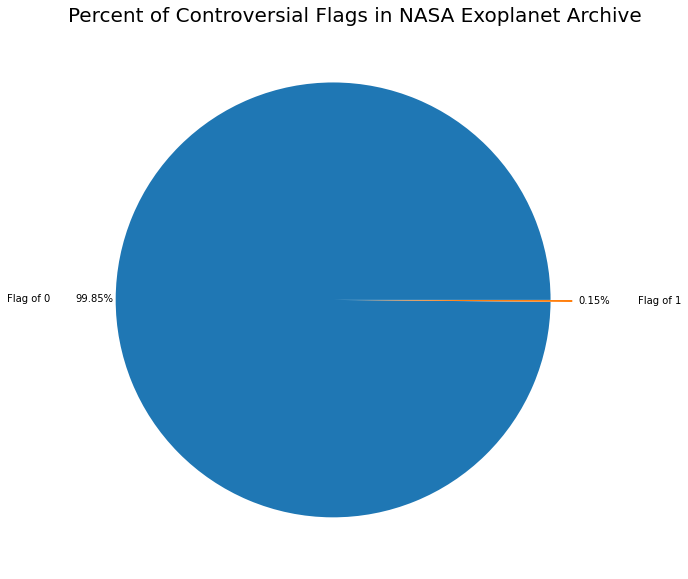

In [11]:
num_pl_flag_0 = controv_flags_col.value_counts()[0]
num_pl_flag_1 = controv_flags_col.value_counts()[1]

nums = [num_pl_flag_0, num_pl_flag_1]
labels = ["Flag of 0", "Flag of 1"]

explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(nums, labels=labels,autopct='%1.2f%%',explode=explode, pctdistance=1.1, labeldistance=1.3)
plt.title('Percent of Controversial Flags in NASA Exoplanet Archive',size=20)
plt.show()

### Duplicate Values

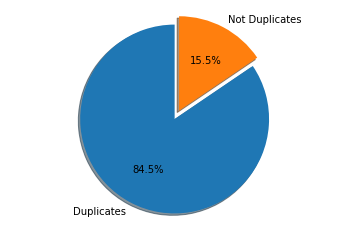

In [12]:
num_duplicates = planet_names.duplicated().sum()
total_planets = len(planet_names)
num_not_duplicated = total_planets - num_duplicates

labels = ['Duplicates', 'Not Duplicates']
pcnt_duplicates = num_duplicates / total_planets
pcnt_non_duplicates = num_not_duplicated / total_planets

sizes = [pcnt_duplicates, pcnt_non_duplicates]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Pie Chart of Habitability

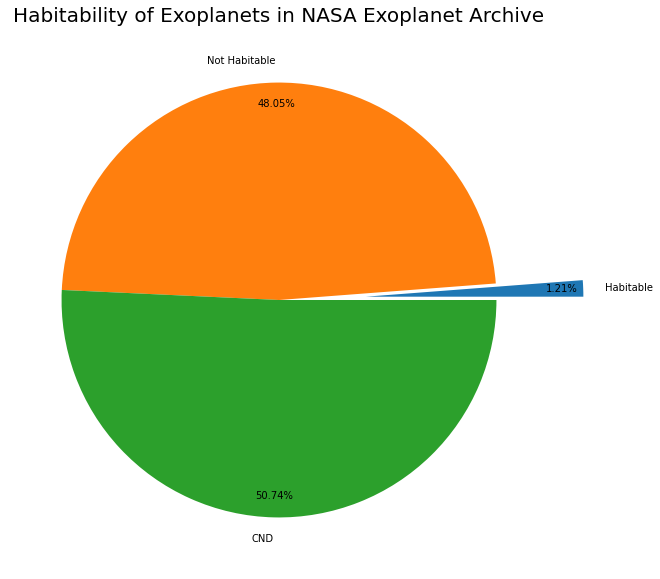

In [13]:
nums = [61, 2417, 2552]
labels = ['Habitable', 'Not Habitable', 'CND']
explode=[0.4,0,0]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(nums, labels=labels,autopct='%1.2f%%',pctdistance=0.9,explode=explode)
plt.title('Habitability of Exoplanets in NASA Exoplanet Archive',size=20)
plt.show()

In [14]:
df2 = df.loc[df['Habitable']=='Yes']

### Histogram of Eccentricity Values of Habitable Exoplanets

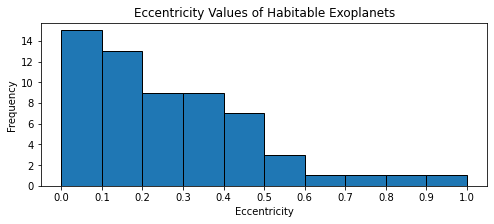

In [15]:
bins = np.linspace(0,1,11)
plt.figure(figsize=(8,3))
plt.hist(df2['pl_orbeccen'],bins=bins,ec='black')
plt.xticks(ticks=bins)
plt.title('Eccentricity Values of Habitable Exoplanets')
plt.xlabel('Eccentricity')
plt.ylabel('Frequency')
plt.show()

### Histogram of Orbital Period Values of Habitable Exoplanets

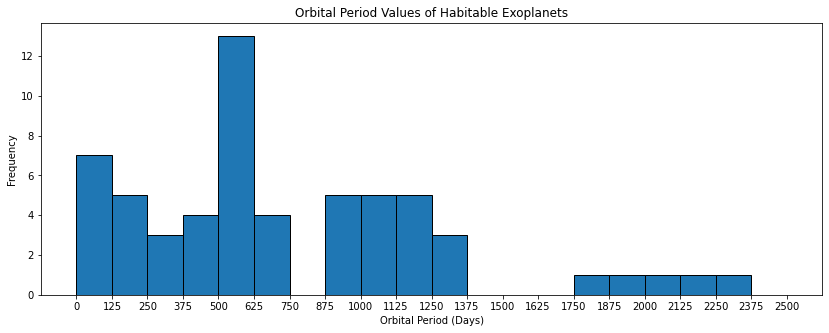

In [16]:
plt.figure(figsize=(14,5))
bins = np.linspace(0,2500,21)
plt.hist(df2['pl_orbper'],bins=bins,ec='black')
plt.title('Orbital Period Values of Habitable Exoplanets')
plt.xticks(bins)
plt.xlabel('Orbital Period (Days)')
plt.ylabel('Frequency')
plt.show()

### Histogram of Semi-Major Axis Values of Habitable Exoplanets

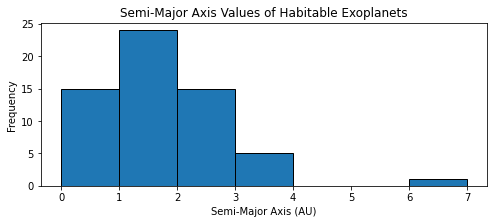

In [17]:
plt.figure(figsize=(8,3))
bins=np.linspace(0,7,8)
plt.hist(df2['pl_orbsmax'],bins=bins,ec='black')
plt.title('Semi-Major Axis Values of Habitable Exoplanets')
plt.xticks(bins)
plt.xlabel('Semi-Major Axis (AU)')
plt.ylabel('Frequency')
plt.show()

In [18]:
planets_to_be_determined = df["Habitable"]
planets_to_be_determined

0        No
1        No
2        No
3        No
4        No
       ... 
4433    CND
4434     No
4435     No
4436     No
4437     No
Name: Habitable, Length: 4438, dtype: object

# Exporting our data

In [19]:
for planet in planets:
    print(planet)

with open('../data/habitable-planets.csv', 'w', newline='') as csvfile:
    fieldnames = ['number', 'pl_name']
    planet_count = 0

    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for planet in planets:
        planet_count += 1
        writer.writerow({'number': planet_count, 'pl_name': planet})

BD-06 1339 c
GJ 3293 c
GJ 3323 c
GJ 876 c
HD 10180 g
HD 103891 b
HD 10442 b
HD 109286 b
HD 114729 b
HD 125612 b
HD 128356 b
HD 132406 b
HD 141937 b
HD 142415 b
HD 147513 b
HD 159868 b
HD 16175 b
HD 163607 c
HD 165155 b
HD 17674 b
HD 18015 b
HD 181720 b
HD 183263 b
HD 190647 b
HD 213240 b
HD 214823 b
HD 216437 b
HD 219415 b
HD 221585 b
HD 222582 b
HD 224538 b
HD 23079 b
HD 23127 b
HD 34445 b
HD 38529 c
HD 4113 b
HD 43197 b
HD 65216 b
HD 7199 b
HD 9174 b
HIP 5158 b
KELT-6 c
KIC 9663113 b
Kapteyn c
Kepler-1318 b
Kepler-16 b
Kepler-1600 b
Kepler-1630 b
Kepler-1647 b
Kepler-1649 c
Kepler-1704 b
Kepler-1708 b
Kepler-174 d
Kepler-1868 b
Kepler-440 b
Kepler-454 c
NY Vir c
WASP-41 c
WASP-47 c
Wolf 1061 d
